In [14]:
import numpy as np
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [15.00, 15.00]
plt.rcParams["figure.autolayout"] = True

In [15]:
image_path = "spiral.jpg"

In [17]:
# Click on image to collect the dots for fitting the spiral
%matplotlib tk

fig = plt.figure(figsize=(100,100))

img=mpimg.imread(image_path)

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("[",ix, ",", iy, "],")

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)

plt.show()

In [18]:
"""
direction: 
-----> x
|
|
|
\/
y
"""
x0, y0 = 584.3994757902645, 557.807969209924
dots_set = [
   
    [
[ 622.2719293471354 , 573.5111816603338 ],
[ 640.7462969358529 , 616.6180393673411 ],
[ 631.5091131414941 , 658.1853664419555 ],
[ 606.8766230232042 , 699.7526935165697 ],
[ 569.9278878457693 , 730.5433061644321 ],
[ 497.56994812329253 , 739.7804899587909 ],
[ 417.51435523885027 , 715.1479998405009 ],
[ 351.31453804594605 , 668.9620808687073 ],
[ 308.20768033893864 , 598.1436717786237 ],
[ 294.3519046474005 , 511.929956364609 ],
[ 298.9704965445799 , 427.25577158298734 ],
[ 323.60298666286985 , 354.89783186051056 ],
    ],
    [
[ 597.6394392288454 , 522.7066707913608 ],
[ 642.285827568246 , 518.0880788941814 ],
[ 685.3926852752535 , 544.2600996448645 ],
[ 719.262359187902 , 602.7622636758031 ],
[ 723.8809510850814 , 692.0550403546041 ],
[ 702.3275222315777 , 747.4781431207564 ],
[ 651.5230113626047 , 793.66406209255 ],
[ 580.7046022725211 , 824.4546747404124 ],
[ 509.8861931824375 , 839.8499810643436 ],
[ 437.52825345996087 , 833.6918585347712 ],
[ 363.63078310509104 , 795.2035927249432 ],
[ 289.7333127502211 , 725.9247142672527 ],
    ],
    [
[ 552.9930508894448 , 524.2462014237539 ],
[ 556.0721121542311 , 487.297466246319 ],
[ 588.4022554344866 , 453.42779233367037 ],
[ 639.2067663034596 , 441.1115472745254 ],
[ 691.5508078048259 , 453.42779233367037 ],
[ 748.5134412033714 , 478.06028245196023 ],
[ 799.3179520723444 , 525.785732056147 ],
[ 834.7271566173862 , 616.6180393673411 ],
[ 820.871380925848 , 681.2783259278523 ],
[ 796.238890807558 , 750.5572043855427 ],
[ 756.2110943653369 , 804.4407765193018 ],
[ 683.8531546428602 , 846.0081035939162 ]
    ],
    [
[ 554.5325815218381 , 578.1297735575131 ],
[ 511.4257238148307 , 571.9716510279407 ],
[ 483.7141724317545 , 533.4833852181126 ],
[ 482.1746417993613 , 485.75793561392584 ],
[ 502.1885400204719 , 430.33483284777355 ],
[ 545.2953977274793 , 385.688444508373 ],
[ 613.0347455527766 , 356.43736249290373 ],
[ 685.3926852752535 , 351.81877059572435 ],
[ 766.9878087920889 , 376.4512607140143 ],
[ 833.1876259849931 , 421.0976490534148 ],
[ 865.5177692652486 , 481.13934371674657 ],
[ 873.2154224272141 , 553.4972834392232 ],
    ], 
    [
[ 586.8627248020936 , 596.6041411462306 ],
[ 571.4674184781624 , 635.0924069560587 ],
[ 526.8210301387618 , 644.3295907504173 ],
[ 479.0955805345751 , 635.0924069560587 ],
[ 439.0677840923539 , 608.9203862053755 ],
[ 408.2771714444915 , 558.1158753364026 ],
[ 395.9609263853465 , 501.15324193785705 ],
[ 400.5795182825259 , 442.65107790691854 ],
[ 420.5934165036365 , 391.84656703794553 ],
[ 449.84449851910574 , 344.12111743375874 ],
[ 494.4908868585063 , 297.9351984619651 ],
[ 566.848826580983 , 264.0655245493165 ],
    ], 
]

In [19]:
def get_r(x, y):
    return math.sqrt(x*x + y*y)

def get_theta(x, y):
    # clock-wise increasing, [0, 2*pi]
    if abs(x) < 1e-6: 
        x = 1e-6
    
    base = np.arctan(y/x)
    if x < 0 and y > 0:
        return math.pi + base
    if x < 0 and y < 0:
        return base + math.pi
    if x > 0 and y < 0:
        return base + 2 * math.pi
    return base

def get_xy(theta, r):
    # theta in [0, 2*pi]
    x = r*math.cos(theta)
    y = r*math.sin(theta)
    return x, y
    
def rotate(x, y, t):
    x_new = x * math.cos(t) - y * math.sin(t)
    y_new = x * math.sin(t) + y * math.cos(t)
    return x_new, y_new

# r = a + b*theta
# get a list of (r, theta) -> transformed from (x, y)
# fit the params (a, b)

def transform(dots, x0, y0):
    rs = []
    thetas = []
    for x1, y1 in dots:
        dx = x1 - x0
        dy = y1 - y0
        rs.append(get_r(dx, dy))
        thetas.append(get_theta(dx, dy))
    # get the difference between thetas 
    t0 = thetas[0]
    for i in range(len(thetas)):
        d_theta = thetas[i] - t0
        if d_theta < 0:
            d_theta += 2 * math.pi
        thetas[i] = d_theta
    return thetas, rs

76.81705213998278 51.087189338442585


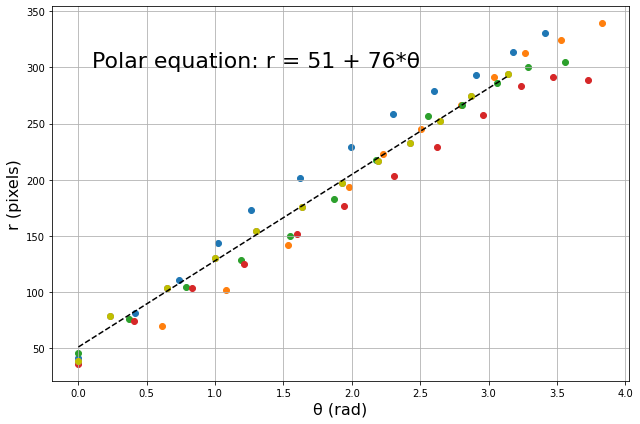

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(9,6))
for i in range(5):
    thetas, rs = transform(dots_set[i], x0, y0)
#     plt.plot(thetas, rs)
    plt.scatter(thetas, rs)
plt.grid()
plt.xlabel("θ (rad)", fontsize=16)
plt.ylabel("r (pixels)" , fontsize=16)

m, b = np.polyfit(thetas, rs, 1)

plt.plot(thetas, rs, 'yo', thetas, [m*theta+b for theta in thetas], '--k')
plt.text(0.1, 300, "Polar equation: r = {} + {}*θ".format(int(b), int(m)), fontsize=22)
# plt.show()
print(m, b)


In [38]:
%matplotlib tk

fig = plt.figure(figsize=(100,100))

img=mpimg.imread(image_path)
imgplot = plt.imshow(img)


thetas_ = np.linspace(0, 1.5*math.pi, 1000)
rs_ = [b + m * theta for theta in thetas_]

for i in range(5):
    xs = []
    ys = []
    for t, r in zip(thetas_, rs_):
        x, y = get_xy(t, r)
        x, y = rotate(x, y, math.pi*2/5 * i)
        xs.append(x + x0)
        ys.append(y + y0)
    plt.scatter(xs, ys, )
plt.show()